In [55]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets

batch_size = 12

train_data = datasets.MNIST('D:\datasets', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST('D:\datasets', train = False, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)


class MLP(nn.Module):
    def __init__(self, l_layer):
        super(MLP, self).__init__()
        self.l_layer = l_layer
        layer_list = [nn.Linear(l_layer[i], l_layer[i+1]) for i in range(len(l_layer) - 1)]
        self.l_layers = nn.ModuleList(layer_list)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()

    
    def forward(self, x):
        a = x.view(-1, 28 * 28)
        for l in self.l_layers[:-1]:
            a = self.relu(l(a))
        return a
    

model = MLP([28 * 28, 512, 256, 128, 64, 10])
#model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        ouputs = model(inputs)
        loss = criterion(ouputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.096
[1,  4000] loss: 1.381
[2,  2000] loss: 0.759
[2,  4000] loss: 0.699
[3,  2000] loss: 0.630
[3,  4000] loss: 0.621
[4,  2000] loss: 0.591
[4,  4000] loss: 0.577
[5,  2000] loss: 0.548
[5,  4000] loss: 0.556
[6,  2000] loss: 0.471
[6,  4000] loss: 0.085
[7,  2000] loss: 0.061
[7,  4000] loss: 0.058
[8,  2000] loss: 0.050
[8,  4000] loss: 0.046
[9,  2000] loss: 0.038
[9,  4000] loss: 0.041
[10,  2000] loss: 0.032
[10,  4000] loss: 0.030
Finished Training


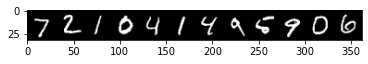

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
Prediction
    7   2   1   0   4   1   4   9   5   9   0   6
9771/10000
Accuracy:  0.977


In [56]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print("Prediction")
print("  "+' '.join('%3s' % label.item() for label in predicted))

n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()

print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict: .3f}")